In [397]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [398]:
df = pd.read_csv("co2.csv")
print(df)


       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [399]:

print(df.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [400]:
df.info()
print("**********************************************************")
print("Unique elements-")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [401]:
print(df.isnull().sum())


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


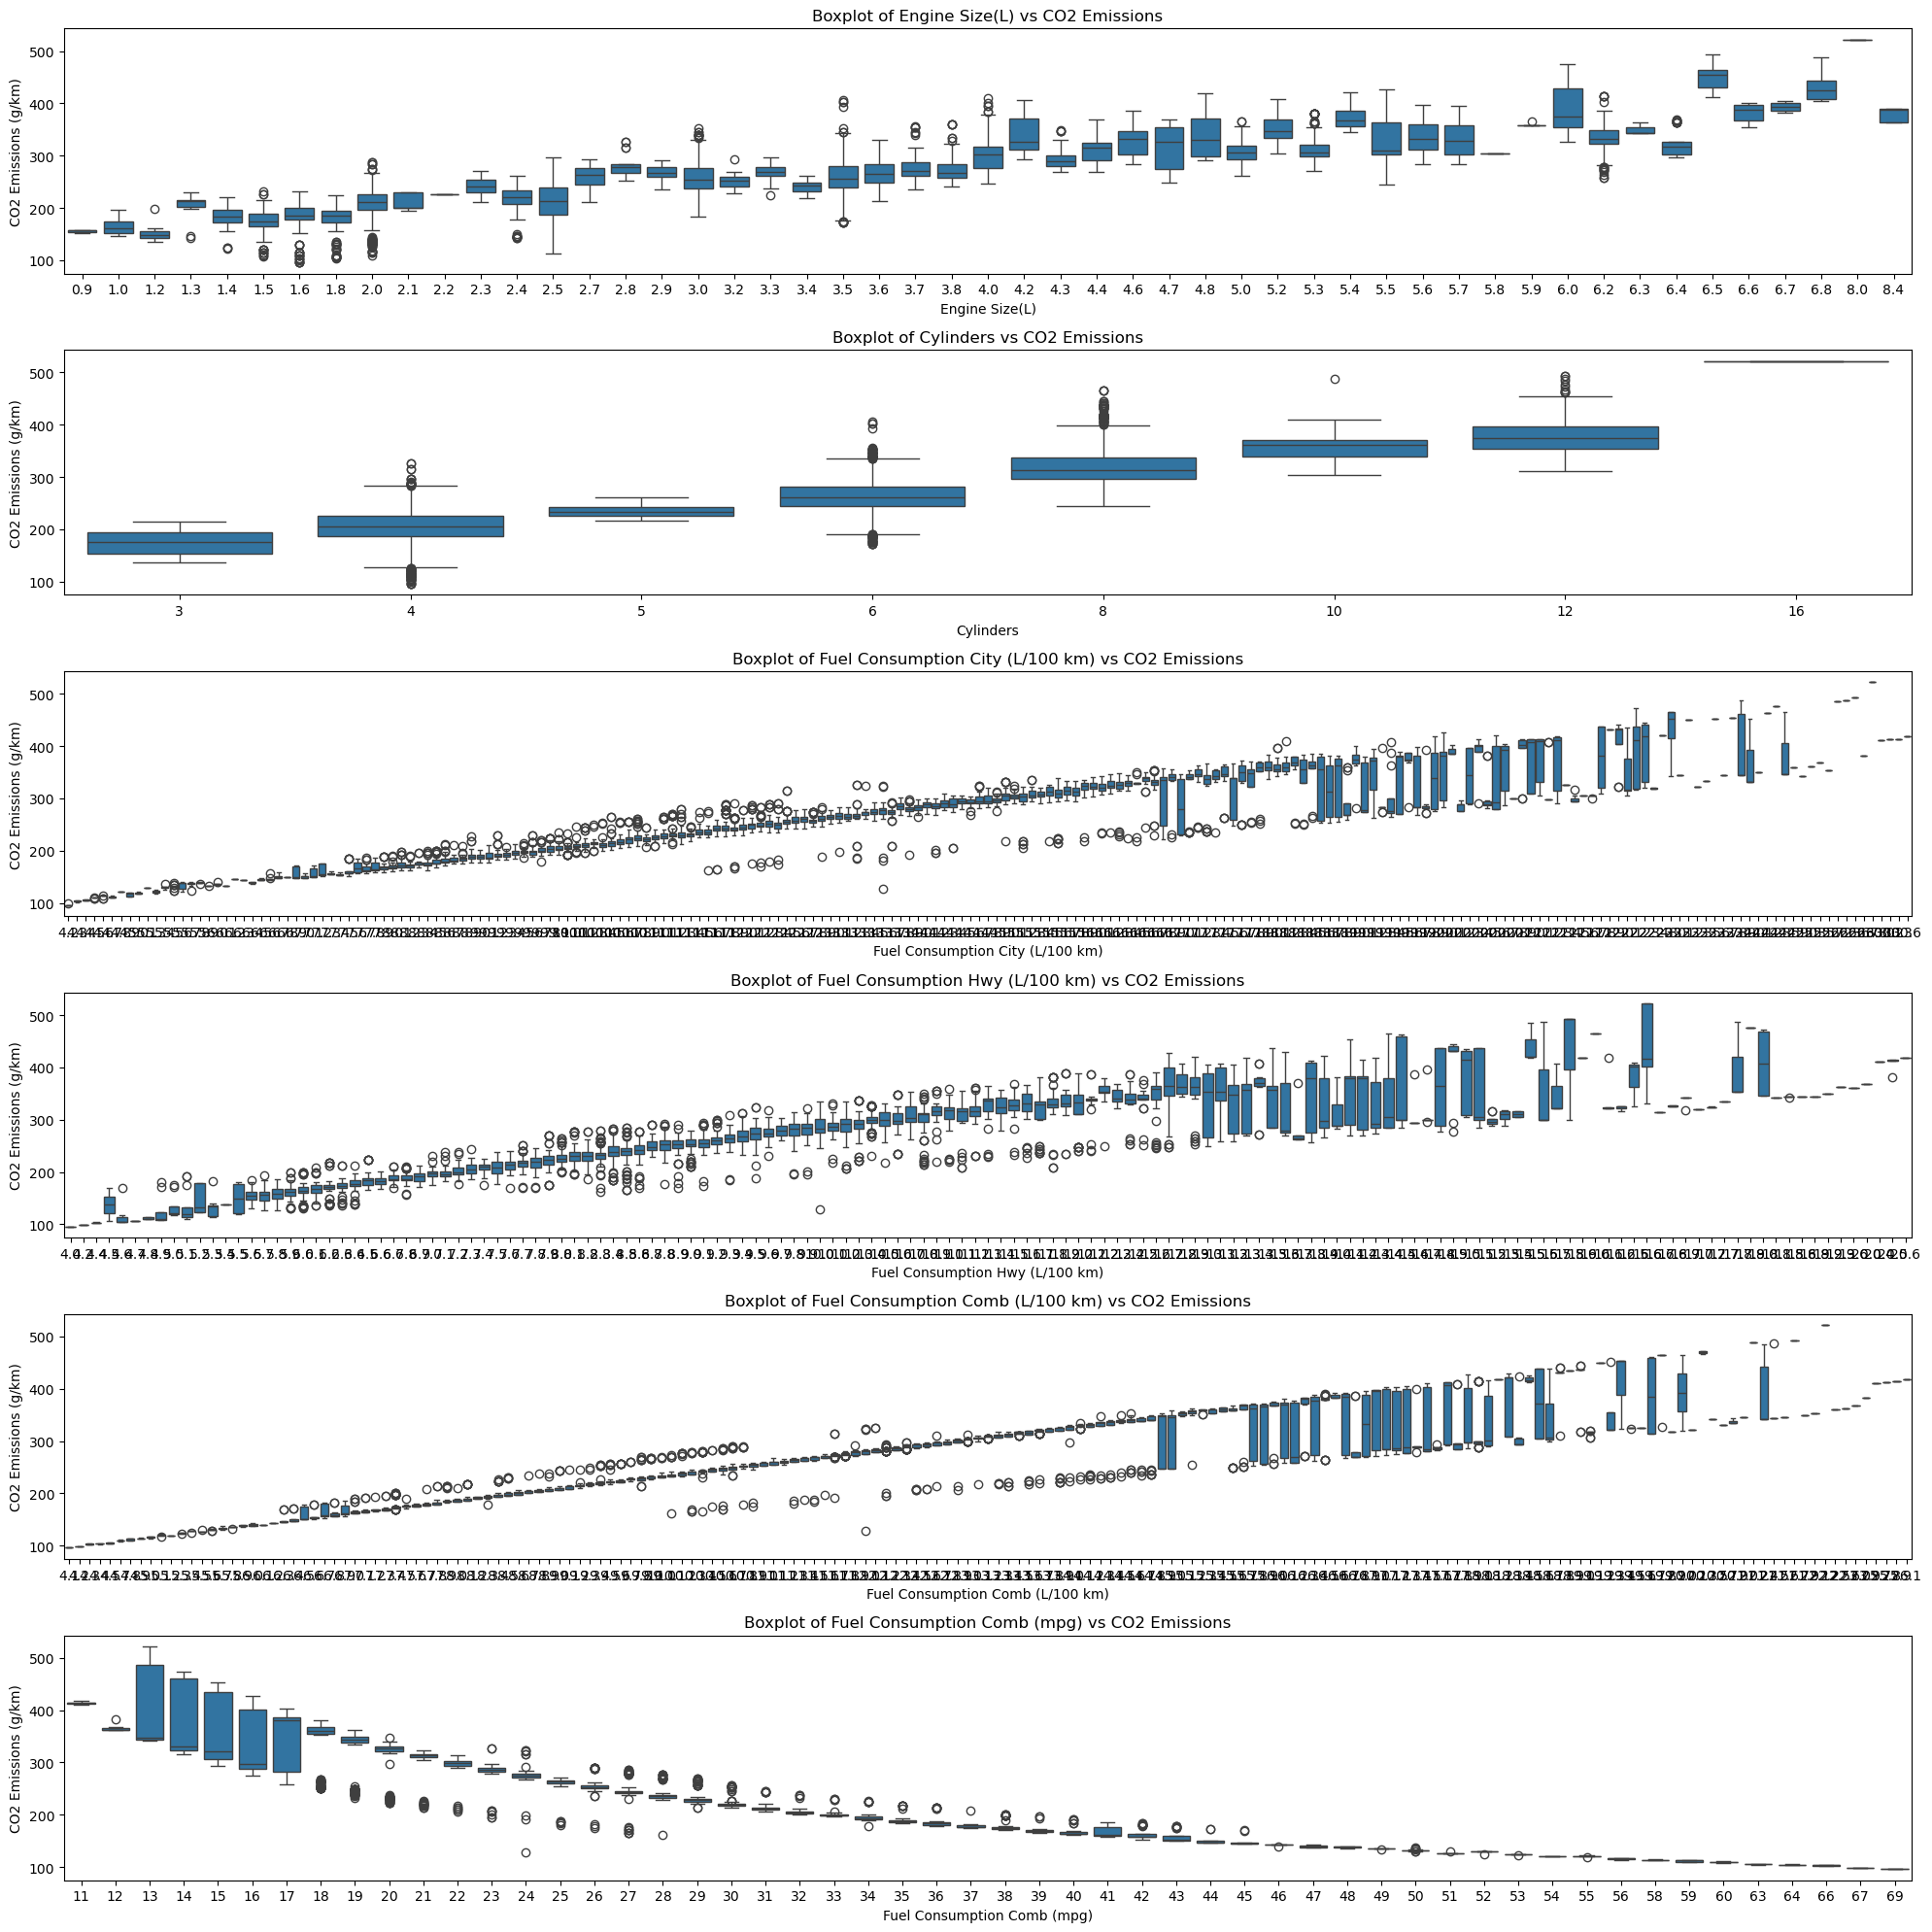

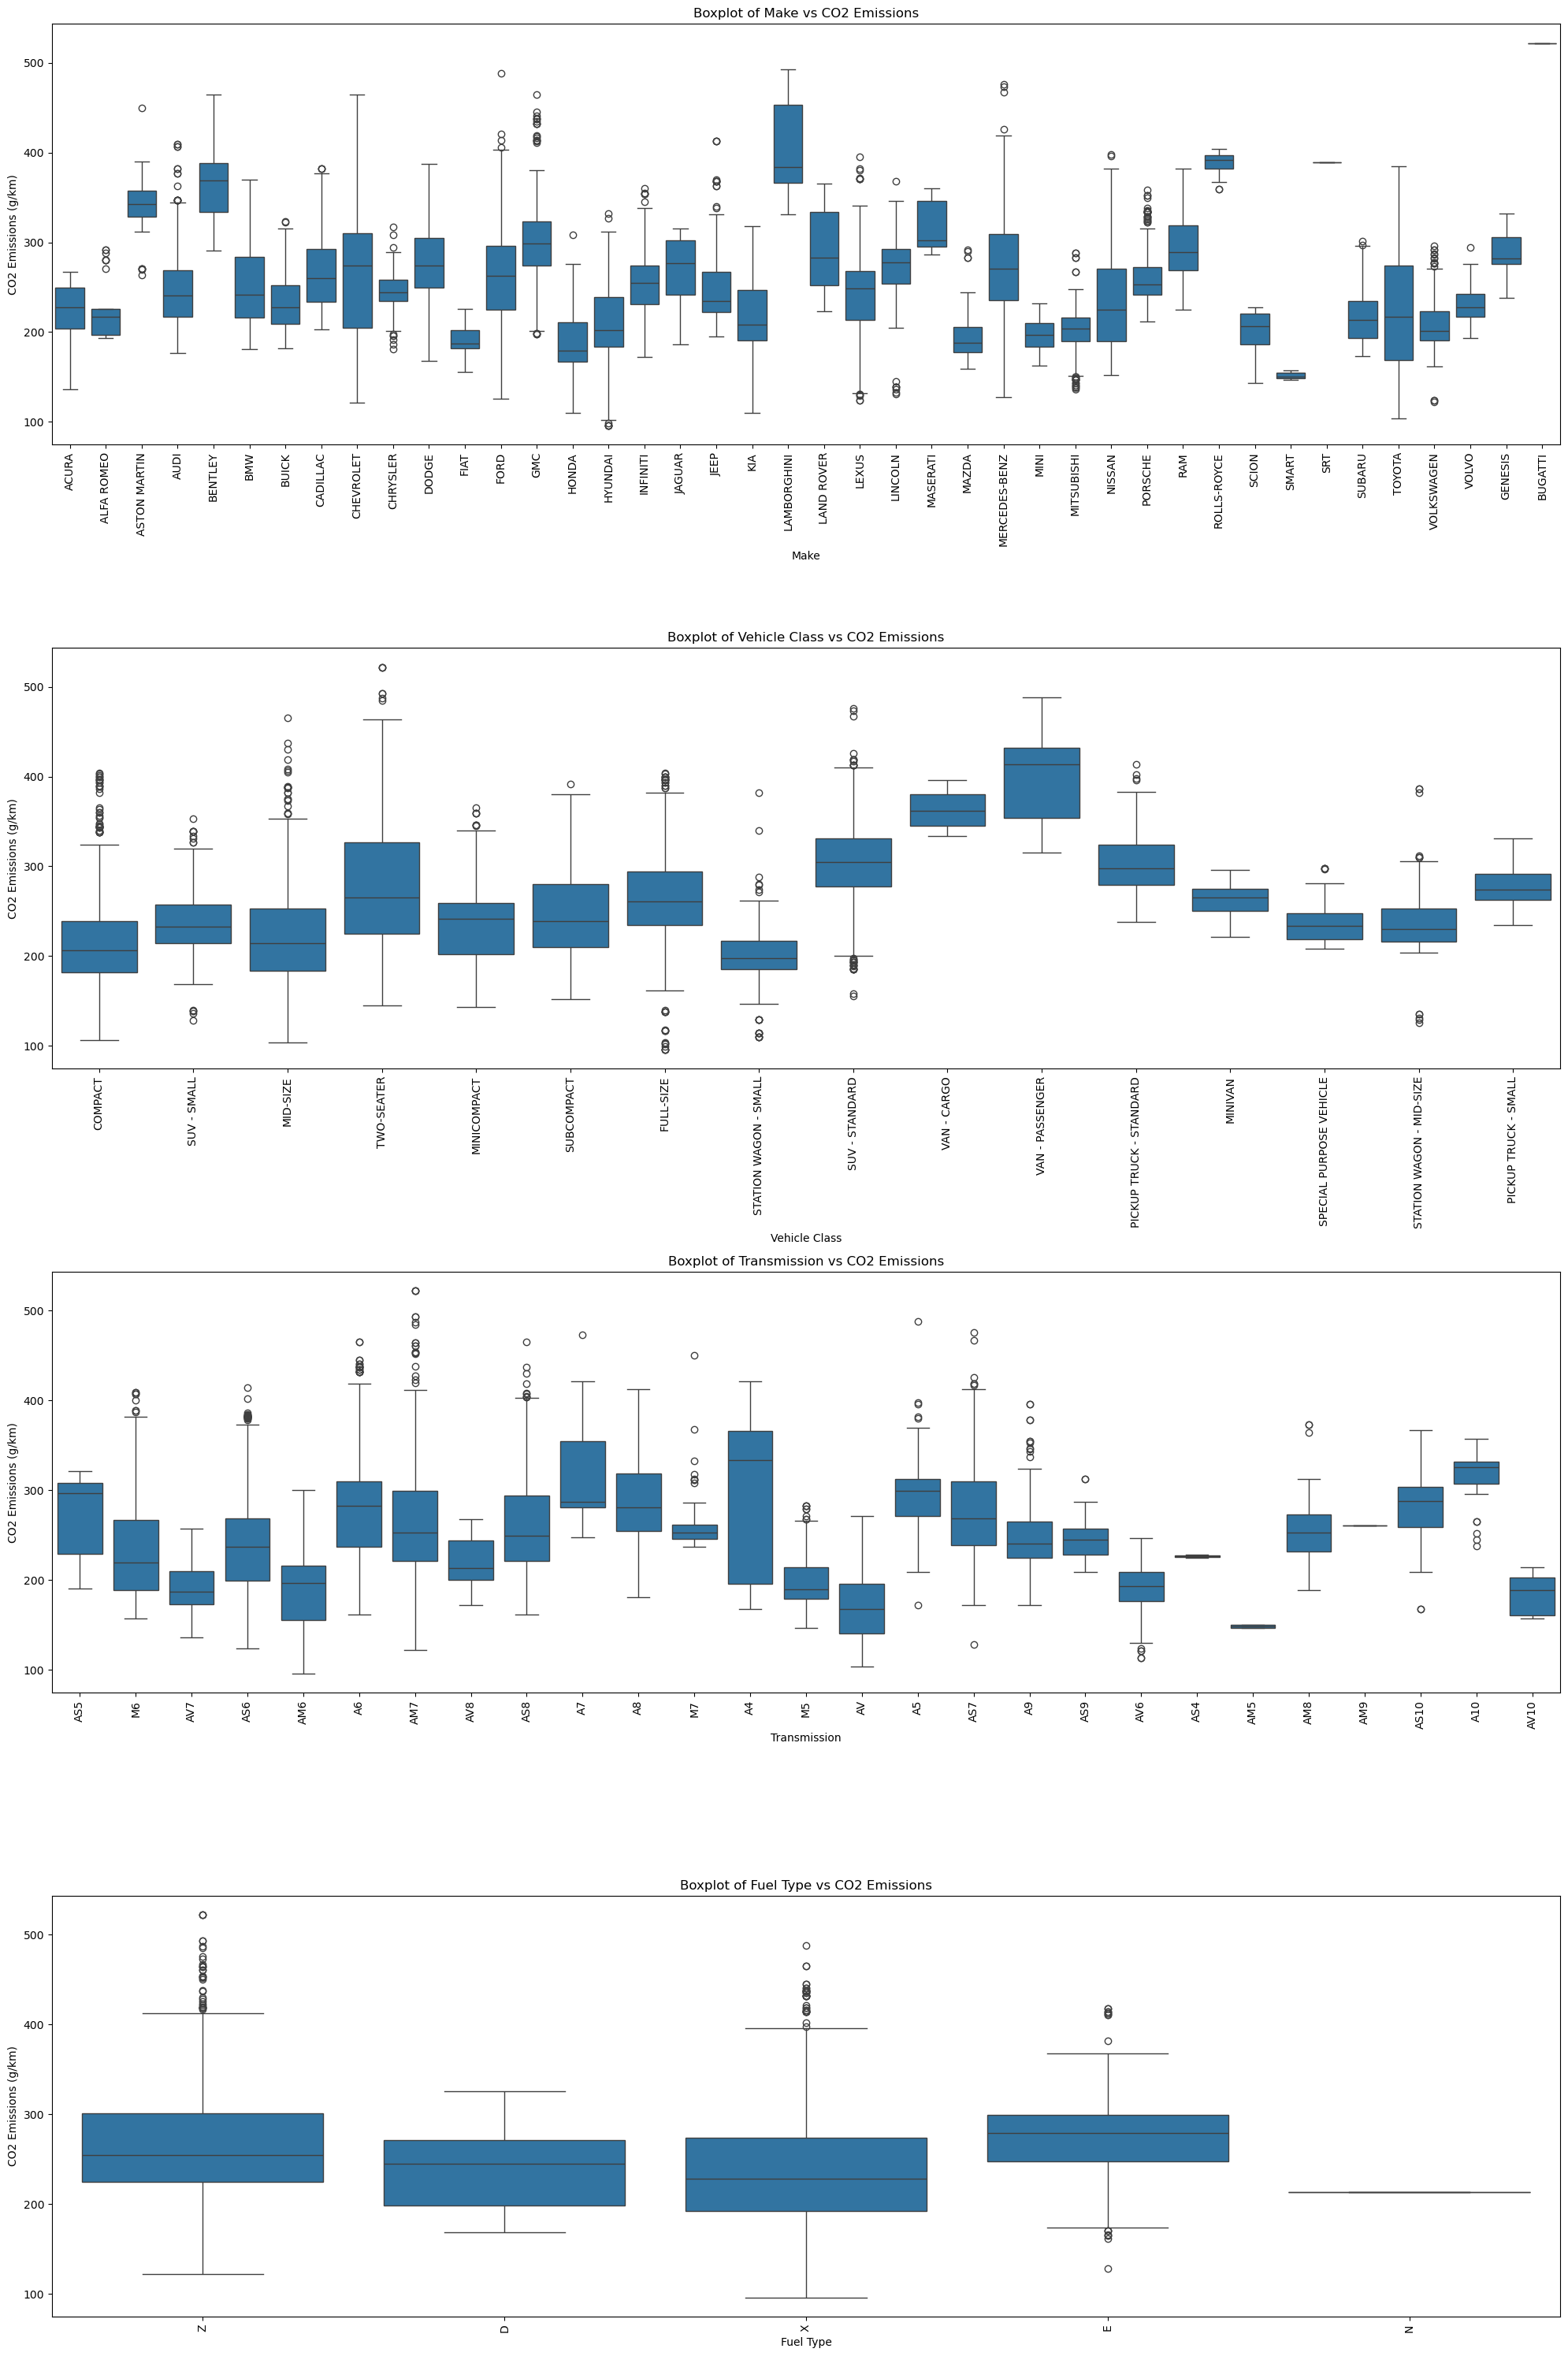

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features into numeric and categorical
numeric_features = [
    'Engine Size(L)', 'Cylinders',
    'Fuel Consumption City (L/100 km)', 
    'Fuel Consumption Hwy (L/100 km)', 
    'Fuel Consumption Comb (L/100 km)', 
    'Fuel Consumption Comb (mpg)'
]

categorical_features = [
    'Make', 'Vehicle Class', 'Transmission', 'Fuel Type'
]

# Create boxplots for numeric features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x=df[feature], y=df['CO2 Emissions(g/km)'])
    plt.title(f'Boxplot of {feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()

# Create boxplots for categorical features
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.boxplot(x=df[feature], y=df['CO2 Emissions(g/km)'])
    plt.title(f'Boxplot of {feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions (g/km)')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


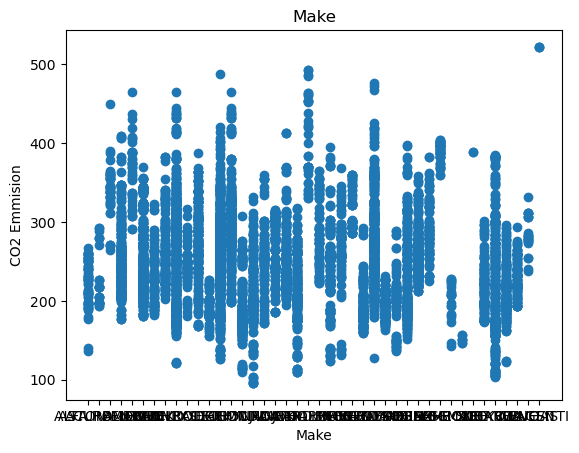

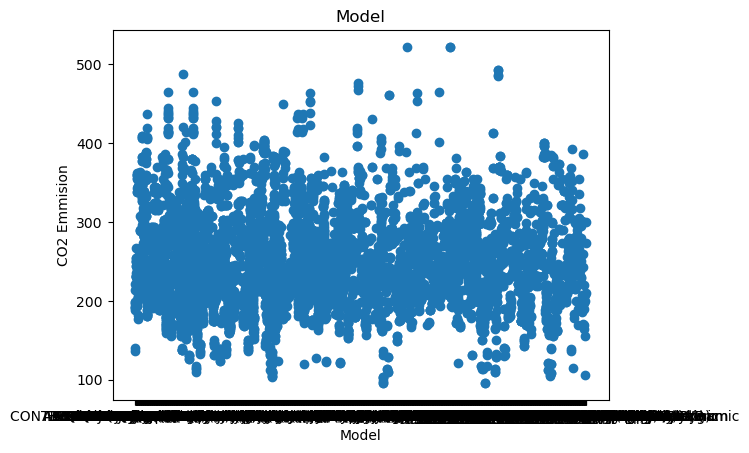

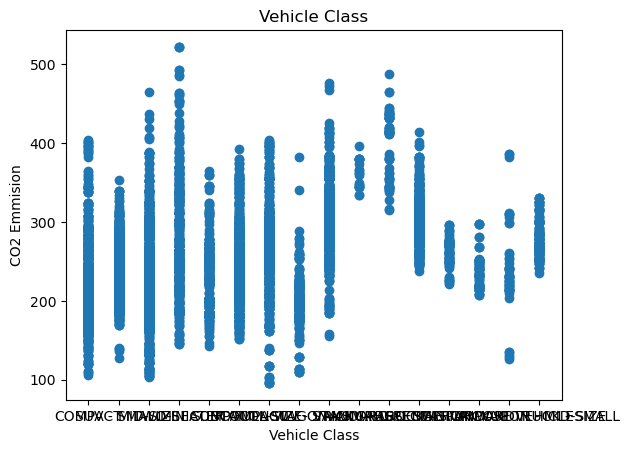

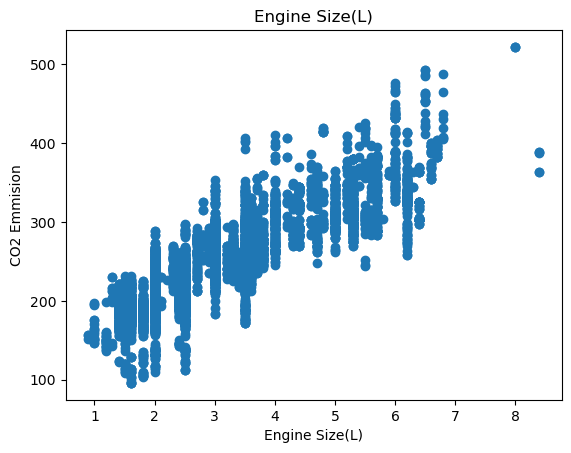

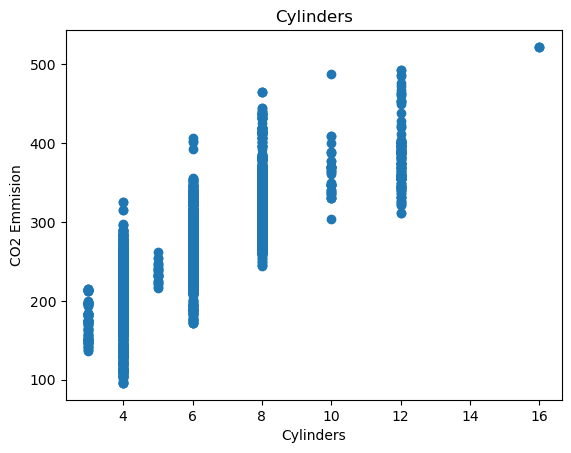

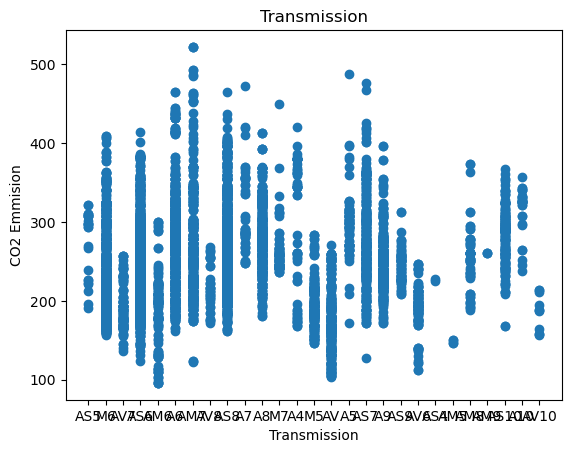

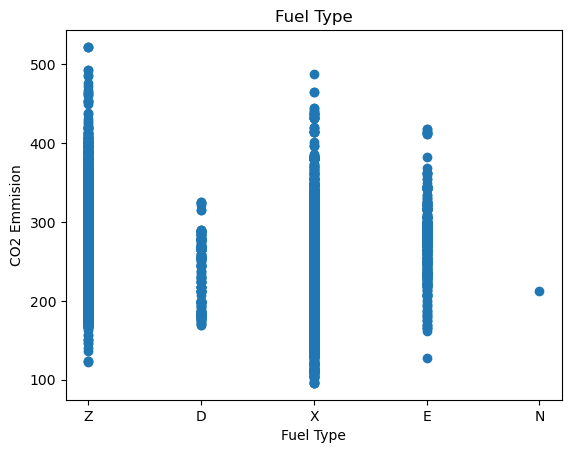

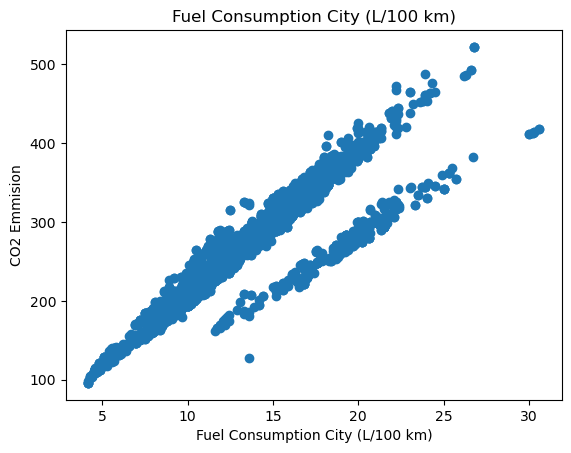

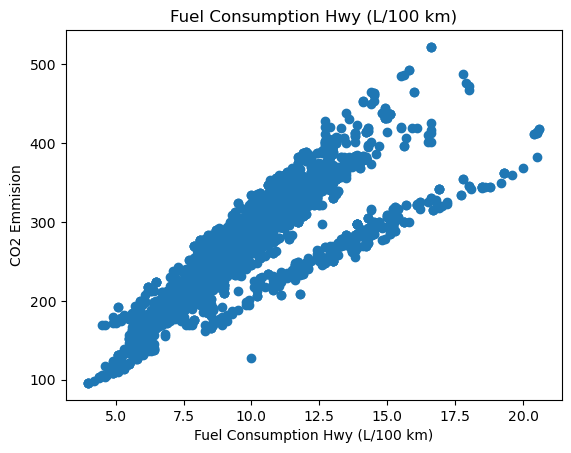

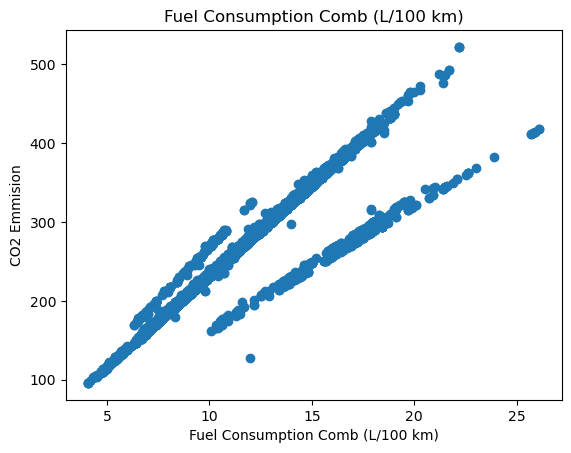

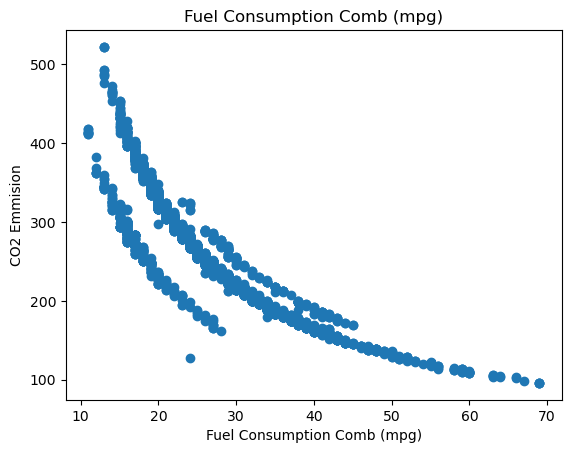

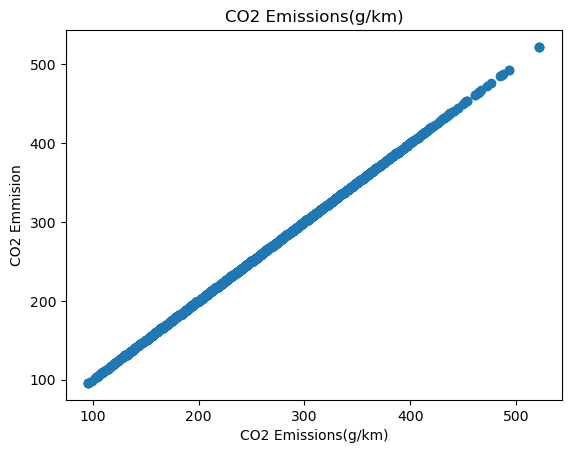

In [403]:
for label in df.columns[:]:
    plt.scatter(df[label],df["CO2 Emissions(g/km)"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("CO2 Emmision")
    plt.show()  

In [404]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

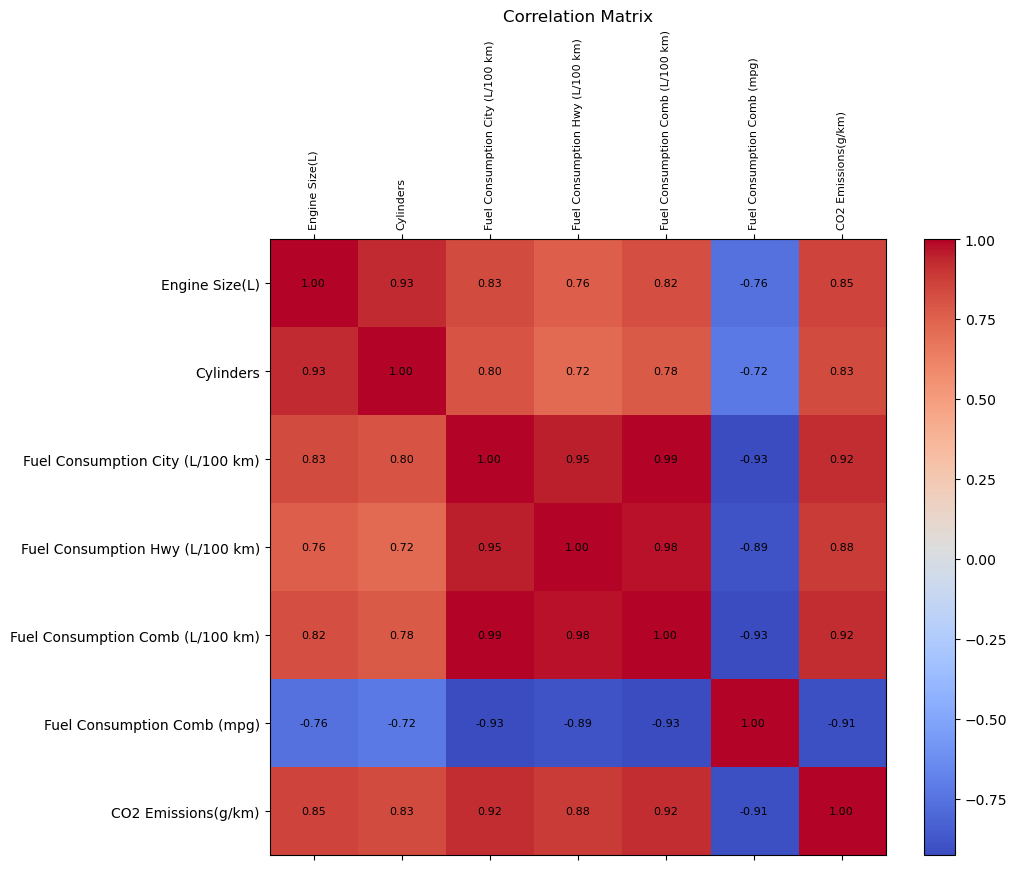

In [405]:
# Correlation matrix heatmap
corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 8)) #creating figure and axes
cax = ax.matshow(corr_matrix, cmap='coolwarm')   #ax.matshow works like heatmap in sns

plt.xticks(rotation=45, fontsize=8)

fig.colorbar(cax)  #legend
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Matrix")

for (i, j), val in np.ndenumerate(corr_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=8)

#np.ndenumerate gives values of each box, stored in val. extracted as row and column in (i,j)
#f'{val:.2f} sets val to s decimal places 


plt.show()


In [406]:
print(df.columns)


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [407]:
df= df.drop(columns=["Transmission","Make", "Fuel Type", "Vehicle Class", "Model","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)"])
print(df.columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [408]:
columns= ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

def min_max_scaling(df, columns):
    scaled_df = df.copy()
    for col in columns:
        min_value = scaled_df[col].min()
        max_value = scaled_df[col].max()
        scaled_df[col] = (scaled_df[col] - min_value) / (max_value - min_value)
    return scaled_df


In [409]:
def z2_normal(df, columns):
    normalized_df = df.copy()
    for col in columns:
        mean_value = normalized_df[col].mean()
        std_value = normalized_df[col].std()
        normalized_df[col] = (normalized_df[col] - mean_value) / std_value
    return normalized_df


In [410]:
def mean_normalization(df, columns):
    normalized_df=df.copy()
    for col in columns:
        mean_value= normalized_df[col].mean()
        min_value= normalized_df[col].min()
        max_value= normalized_df[col].max()
        normalized_df[col]=( normalized_df[col]-mean_value)/(max_value-min_value)
    return normalized_df

In [411]:
df= z2_normal(df, columns)

In [412]:
def get_xy(df, y_label, x_labels=None):
    #x_labels being none means get all columns from the df
    df= copy.deepcopy(df) #find out what this is.
    if x_labels is None:
        x = df.drop(columns=[y_label])
    else:
        if len(x_labels)==1:
            x= df[x_labels[0]].values.reshape(-1,1)
        else:
            x=df[x_labels].values

    

    


    
    y=df[y_label].values.reshape(-1,1)
    #taking values and converting to 2d

    data= np.hstack((x,y))

    return data, x,y


In [413]:
train, val  , test= np.split(df.sample(frac=1), [int(60*len(df)/100),int(80*len(df)/100)]) 
tm,x_train,y_train=get_xy(train,"CO2 Emissions(g/km)",x_labels=df.columns[:-1])
vm,x_val,y_val=get_xy(val,"CO2 Emissions(g/km)",x_labels=df.columns[:-1])
tem,x_test,y_test=get_xy(test,"CO2 Emissions(g/km)",x_labels=df.columns[:-1])

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [414]:
#scaler= StandardScaler()
#x_train=scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

In [415]:
# data is stored in numpy array/matrix
print(f"x Shape: {x_train.shape}, x Type:{type(x_train)})")
print(x_train)
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)
y_val=y_val.reshape(-1)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)
y_val=y_val.reshape(-1)


x Shape: (4431, 4), x Type:<class 'numpy.ndarray'>)
[[-1.00435488 -0.88334776 -1.16683275  1.31616524]
 [ 0.62025596  0.21056072  1.11492546 -1.03453775]
 [-0.11820351  0.21056072  0.49262776 -0.61970781]
 ...
 [ 1.35871543  1.3044692   1.28778593 -1.1728144 ]
 [ 0.32487217  0.21056072 -0.12966993 -0.06660122]
 [-0.85666299 -0.88334776 -0.61367925  0.48650536]]
y Shape: (4431,), y Type:<class 'numpy.ndarray'>)
[-1.2234049   1.30596141  0.72489077 ...  1.49395485 -0.027083
 -0.60815364]


In [416]:
m,n = x_train.shape
w_in = np.random.rand(n) * 0.01  # Small random values
b_in=bias = np.random.rand() * 0.01  # Small random value
# small random no.s-- break symmetry, faster convergence due to preventing overshoot



print(w_in,b_in)

[0.00321004 0.00807162 0.00414122 0.00873823] 0.0043321565404869965


In [417]:
def predict(x,w,b):
    y_pred= np.dot(x,w)+b
    return y_pred


In [418]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2
        
    cost=cost/(2*m)
    return cost


In [419]:
def compute_gradient(x, y, w, b):
    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))  #partial diff of all vector elements also stored in a vector element
    dj_db = 0.0              #float
    #initializing all to 0

    for i in range(m):
        err= (np.dot(x[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j] + err * x[i,j]
        
        #x in multiplication goes through all j's

        dj_db=dj_db+err
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw,dj_db

In [420]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    #alpha is learning rate

    cost_history=[] #empty list j to store cost value over number of iteratoins
    w = copy.deepcopy(w_in)  
    b = b_in

    for i in range(num_iters):
        dj_dw,dj_db= gradient_function(x,y,w,b)
    
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)

        if i<100000:
            cost_history.append(cost_function(x,y,w,b))
    
        if i% math.ceil(num_iters / 10) == 0:
        #loop updates every 10% of number of iterations
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}   ")
        # i formatted to 4 digit no. and taking latest cost, reserving 8 characters and 2 decimal places
    
    return w,b,cost_history

In [421]:
alpha=0.001
w_final, b_final, cost_hist= gradient_descent(x_train,y_train,w_in,b_in,compute_cost,compute_gradient,alpha,1500)


Iteration    0: Cost     0.49   
Iteration  150: Cost     0.21   
Iteration  300: Cost     0.11   
Iteration  450: Cost     0.07   
Iteration  600: Cost     0.06   
Iteration  750: Cost     0.06   
Iteration  900: Cost     0.05   
Iteration 1050: Cost     0.05   
Iteration 1200: Cost     0.05   
Iteration 1350: Cost     0.05   


In [422]:


print("final w= ",w_final)
print("final b= ",b_final)
m=x_test.shape[0]

y_pred=predict(x_test,w_final,b_final)
# Reverse the scaling on the predictions
#y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))


for i in range(m):
    print(f"prediction: {y_pred[i]}, target value: {y_test[i]}")

final w=  [ 0.21585378  0.21698131  0.28757924 -0.28813961]
final b=  -0.0008076260062224023
prediction: -0.6940544010130025, target value: -0.6081536357914656
prediction: -0.9030632868926569, target value: -1.0183211456097612
prediction: 0.4192091696182231, target value: 0.8274326485725689
prediction: -0.5447729273201943, target value: -0.300528003427744
prediction: -0.8473681691144064, target value: -0.8645083294279005
prediction: -0.5447729273201943, target value: -0.4030698808823179
prediction: 1.490765807948929, target value: 1.9724836134819774
prediction: 0.41929695779626924, target value: 0.673619832390708
prediction: 0.18842454860721447, target value: 0.2121813838451255
prediction: -0.5068953638133177, target value: -0.35179894215503094
prediction: -0.04507643188659249, target value: 0.4514457645724646
prediction: -1.2713699764534407, target value: -1.0525017714279525
prediction: -1.2475547119729111, target value: -1.3088564650643872
prediction: 1.273854234978745, target value:

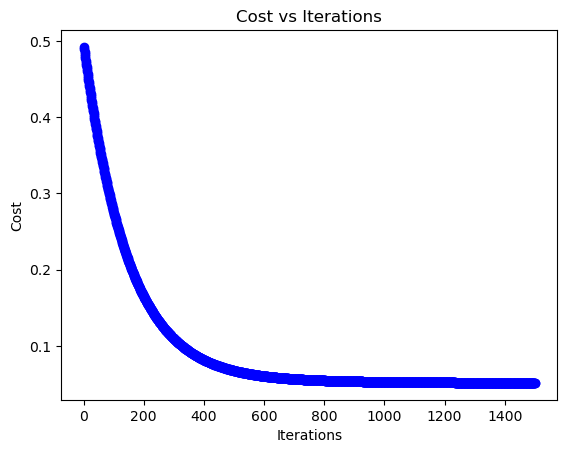

In [423]:
iterations = range(1, len(cost_hist) + 1)
plt.plot(iterations, cost_hist, marker='o', color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')


plt.show()

In [424]:
def r_squared(y_pred, y_true):
    y_mean = np.mean(y_true)

    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    
    # R-squared calculation
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [425]:
r2=r_squared(y_pred,y_test)
print("R2 = ",r2)

R2 =  0.9060558475220957
